<a href="https://colab.research.google.com/github/ncdanh0311/Danh-Data-Projects/blob/main/Liverpool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


In [16]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data_path = "/content/drive/MyDrive/DataAna/"

fixtures = pd.read_csv(data_path + "fixtures.csv")
liverpool_stats = pd.read_csv(data_path + "Liverpool stats.csv")


In [20]:
fixtures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   week        380 non-null    float64
 1   Day         380 non-null    object 
 2   Date        380 non-null    object 
 3   Time        380 non-null    object 
 4   Home        380 non-null    object 
 5   HomeScore   380 non-null    int64  
 6   Away        380 non-null    object 
 7   AwayScore   380 non-null    int64  
 8   Attendance  376 non-null    float64
 9   Venue       380 non-null    object 
 10  Referee     380 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 32.8+ KB


In [19]:
liverpool_stats.head(36)

,player_id,first_name,last_name,age,nation,mp,starts,Mt,full_match,goals,assist,pos
0,1,Allison,Becker,31,BRA,21,21,1890,21,0,0,GK
1,2,Virgil,Van Dijk,32,NED,23,23,2007,22,1,2,DF
2,3,Mohamed,Salah,31,EGY,21,20,1786,20,15,9,FW
3,4,Dominik,Szoboszlai,23,HUN,21,20,1657,18,3,2,MF
4,5,Trent,Alexander-Arnold,25,ENG,21,19,1622,18,2,4,DF
5,6,Luis,Diaz,27,COL,24,19,1568,17,5,3,FW
6,7,Alexis,Mac Allister,25,ARG,20,19,1541,17,2,1,MF
7,8,Darwin,Nunez,24,URU,24,16,1465,16,9,7,FW
8,9,Ibrahima,Konate,24,FRA,18,13,1242,14,0,0,DF
9,10,Diogo,Jota,27,POR,19,13,1047,12,9,3,FW


In [ ]:
# Set up the plotting environment
sns.set(style="whitegrid")

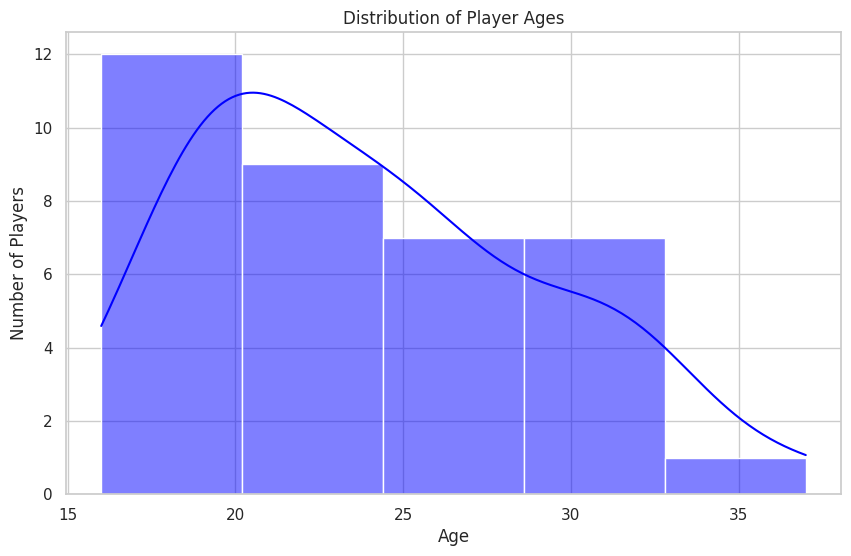

In [ ]:
# 1. Distribution of Player Ages
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=5, kde=True, color='blue')
plt.title('Distribution of Player Ages')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.show()

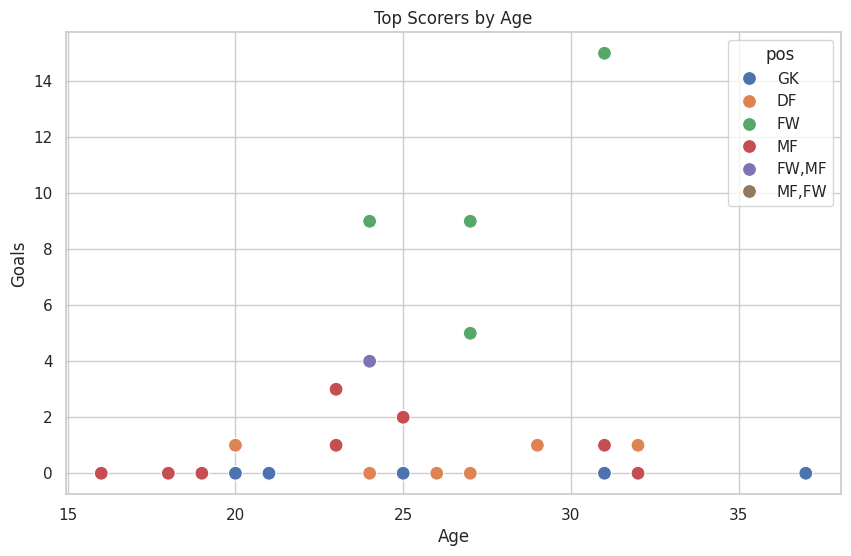

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='goals', data=df, hue='pos', s=100)
plt.title('Top Scorers by Age')
plt.xlabel('Age')
plt.ylabel('Goals')
plt.show()

<Figure size 1000x600 with 0 Axes>

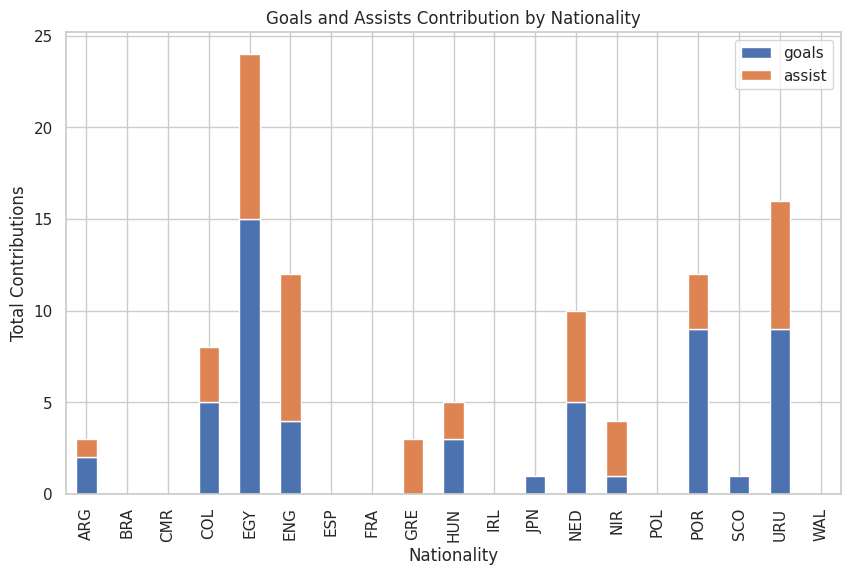

In [ ]:
plt.figure(figsize=(10, 6))
df_grouped = df.groupby('nation')[['goals', 'assist']].sum().reset_index()
df_grouped.set_index('nation').plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Goals and Assists Contribution by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Total Contributions')
plt.show()

/tmp/ipython-input-427543691.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='last_name', y='total_contribution', data=df, palette='magma')


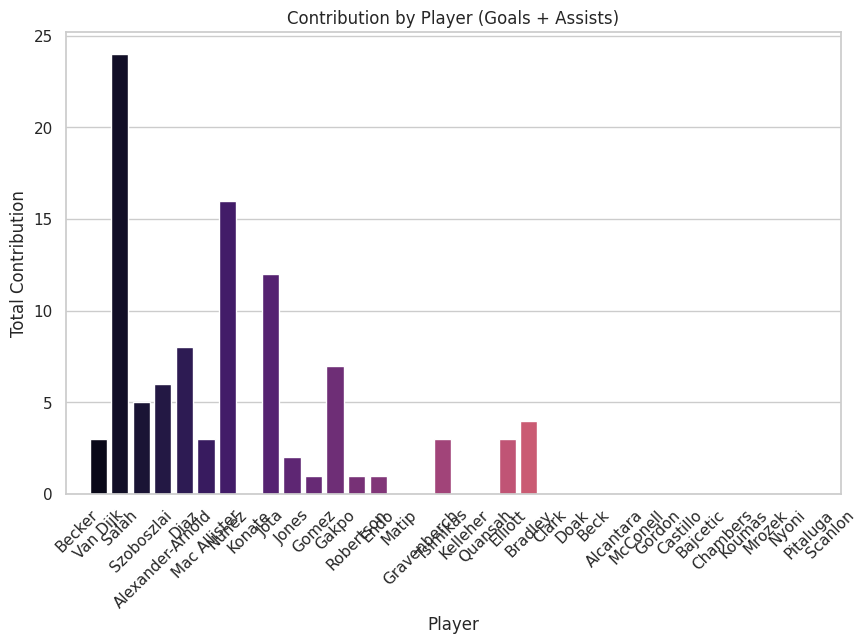

In [ ]:
df['total_contribution'] = df['goals'] + df['assist']
plt.figure(figsize=(10, 6))
sns.barplot(x='last_name', y='total_contribution', data=df, palette='magma')
plt.title('Contribution by Player (Goals + Assists)')
plt.xlabel('Player')
plt.ylabel('Total Contribution')
plt.xticks(rotation=45)
plt.show()

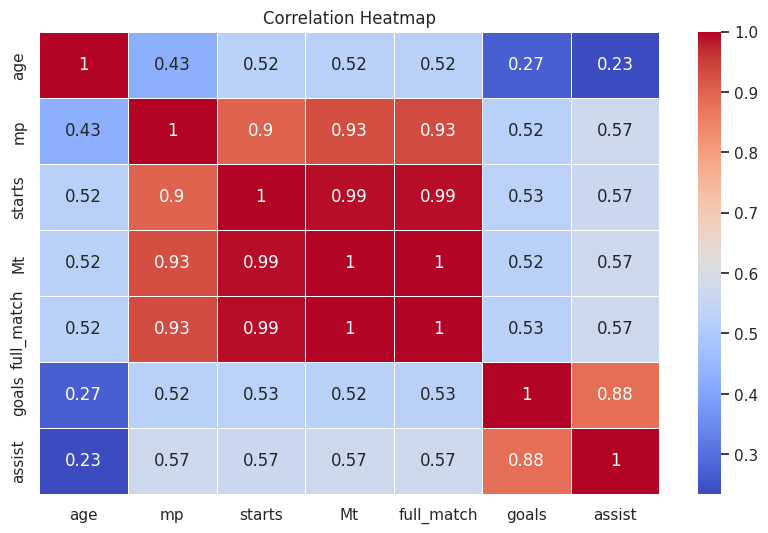

In [ ]:
plt.figure(figsize=(10, 6))
corr = df[['age', 'mp', 'starts', 'Mt', 'full_match', 'goals', 'assist']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
!pip install understat aiohttp nest_asyncio


In [ ]:
import nest_asyncio
import asyncio
import pandas as pd
from understat import Understat
import aiohttp

nest_asyncio.apply()  # Giúp chạy asyncio trong notebook


In [ ]:
from understat import Understat
import aiohttp
import asyncio
import pandas as pd

async def get_liverpool_players():
    async with aiohttp.ClientSession() as session:
        understat = Understat(session)
        data = await understat.get_team_players("Liverpool", 2024)
        df = pd.DataFrame(data)
        print(df.columns)  # Kiểm tra các cột
        return df[["player_name", "xG", "xA", "goals", "assists"]]

liverpool_df = await get_liverpool_players()
liverpool_df.head(20)


Index(['id', 'player_name', 'games', 'time', 'goals', 'xG', 'assists', 'xA',
       'shots', 'key_passes', 'yellow_cards', 'red_cards', 'position',
       'team_title', 'npg', 'npxG', 'xGChain', 'xGBuildup'],
      dtype='object')


,player_name,xG,xA,goals,assists
0,Mohamed Salah,27.70626749098301,15.858334187418222,29,18
1,Luis Díaz,12.3563298471272,6.245185255073011,13,5
2,Cody Gakpo,8.601265830919147,6.257204940542579,10,4
3,Diogo Jota,10.20619698613882,1.852303085848689,6,3
4,Dominik Szoboszlai,7.00856670551002,7.858418172225356,6,6
5,Alexis Mac Allister,3.568436846137047,4.891626043245196,5,5
6,Darwin Núñez,6.912255180999637,1.7422378864139318,5,2
7,Virgil van Dijk,2.821447281166911,1.2135552121326327,3,1
8,Trent Alexander-Arnold,1.8941362705081701,8.056737272068858,3,6
9,Curtis Jones,4.570292007178068,1.7505743531510234,3,3


In [ ]:

# Ép các cột số về dạng float
for col in ["xG", "goals", "xA", "assists"]:
    if col in liverpool_df.columns:
        liverpool_df[col] = pd.to_numeric(liverpool_df[col], errors="coerce")

# Nếu dữ liệu có dấu phẩy làm dấu thập phân, bỏ comment 2 dòng dưới:
# for col in ["xG", "goals", "xA", "assists"]:
#     liverpool_df[col] = pd.to_numeric(liverpool_df[col].astype(str).str.replace(",", "."), errors="coerce")

# Bỏ các hàng thiếu giá trị cần vẽ
plot_df = liverpool_df.dropna(subset=["xG", "goals"]).copy()


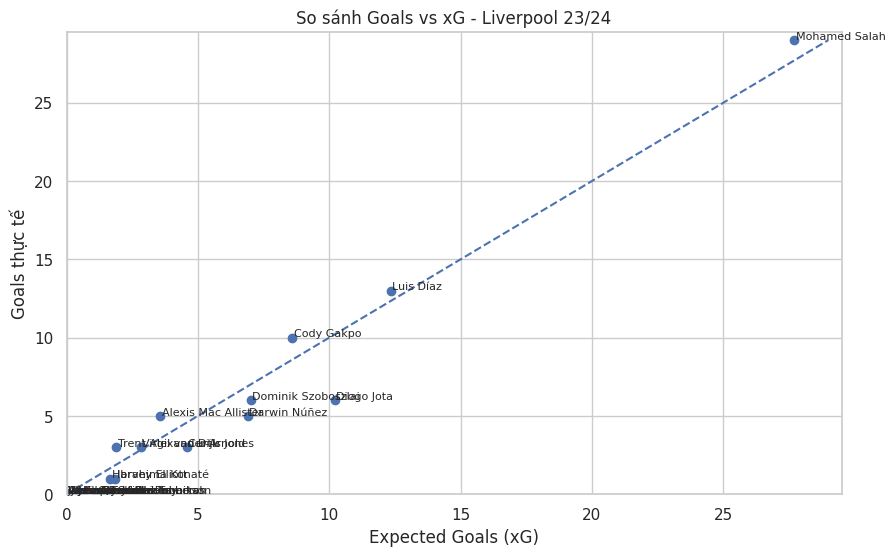

In [ ]:
import matplotlib.pyplot as plt
m = float(max(plot_df["xG"].max(), plot_df["goals"].max()))

plt.figure(figsize=(10,6))
plt.scatter(plot_df["xG"], plot_df["goals"])

# Đường y=x
plt.plot([0, m], [0, m], linestyle="--")

# Ghi nhãn
for _, row in plot_df.iterrows():
    plt.text(float(row["xG"]) + 0.05,
             float(row["goals"]) + 0.05,
             str(row["player_name"]), fontsize=8)

plt.xlabel("Expected Goals (xG)")
plt.ylabel("Goals thực tế")
plt.title("So sánh Goals vs xG - Liverpool 23/24")
plt.xlim(0, m + 0.5)
plt.ylim(0, m + 0.5)
plt.show()

/tmp/ipython-input-968247701.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="player_name", y="total_contribution", data=top5, palette="viridis")


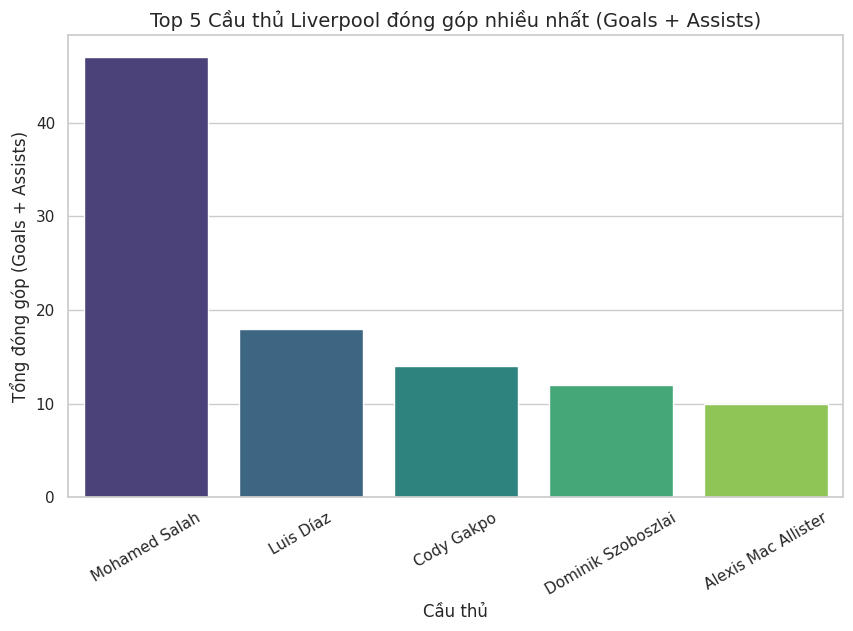

In [ ]:
# Tính tổng đóng góp
liverpool_df["total_contribution"] = liverpool_df["goals"] + liverpool_df["assists"]

# Lấy top 5 cầu thủ
top5 = liverpool_df.sort_values("total_contribution", ascending=False).head(5)

# Vẽ bar chart
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x="player_name", y="total_contribution", data=top5, palette="viridis")

plt.title("Top 5 Cầu thủ Liverpool đóng góp nhiều nhất (Goals + Assists)", fontsize=14)
plt.xlabel("Cầu thủ")
plt.ylabel("Tổng đóng góp (Goals + Assists)")
plt.xticks(rotation=30)
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving fixtures.csv to fixtures.csv


  Location  LiverpoolGoals  LiverpoolConceded
0     Away        2.315789           1.315789
1     Home        2.210526           0.842105


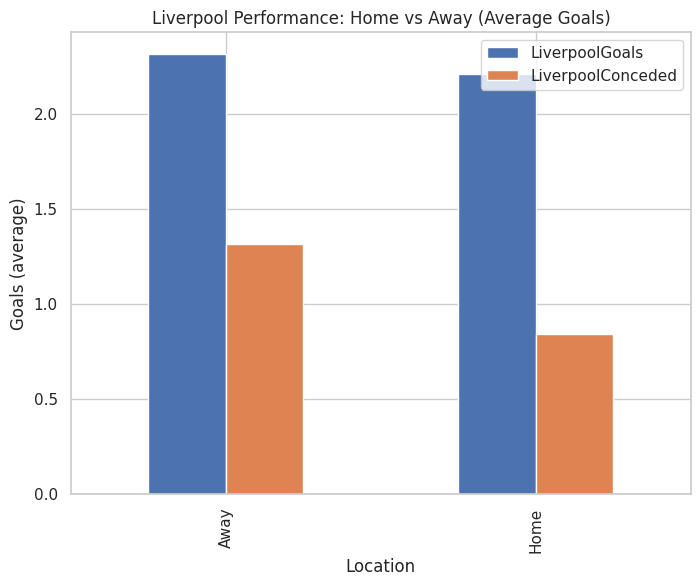

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc file
fixtures = pd.read_csv("fixtures.csv")

# Tạo dataframe chỉ chứa các trận của Liverpool
liverpool_matches = fixtures[(fixtures["Home"] == "Liverpool") | (fixtures["Away"] == "Liverpool")].copy()

# Xác định kết quả và vị trí (Home/Away)
liverpool_matches["Location"] = liverpool_matches.apply(
    lambda row: "Home" if row["Home"] == "Liverpool" else "Away", axis=1
)

# Tính số bàn thắng của Liverpool
liverpool_matches["LiverpoolGoals"] = liverpool_matches.apply(
    lambda row: row["HomeScore"] if row["Home"] == "Liverpool" else row["AwayScore"], axis=1
)

# Tính số bàn thua
liverpool_matches["LiverpoolConceded"] = liverpool_matches.apply(
    lambda row: row["AwayScore"] if row["Home"] == "Liverpool" else row["HomeScore"], axis=1
)

# Tổng hợp theo Home/Away
performance = liverpool_matches.groupby("Location")[["LiverpoolGoals","LiverpoolConceded"]].mean().reset_index()

print(performance)

# Vẽ biểu đồ
performance.plot(x="Location", kind="bar", figsize=(8,6))
plt.title("Liverpool Performance: Home vs Away (Average Goals)")
plt.ylabel("Goals (average)")
plt.show()


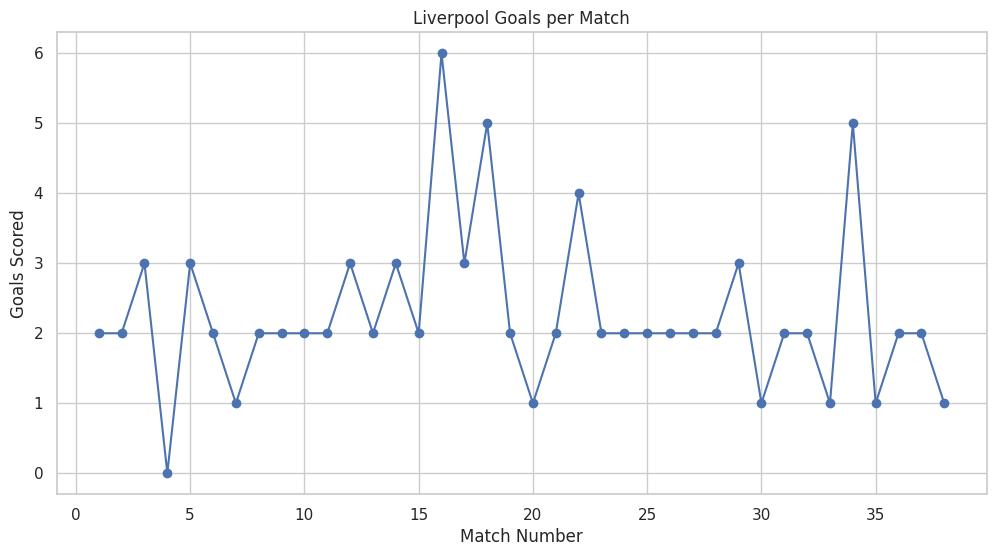

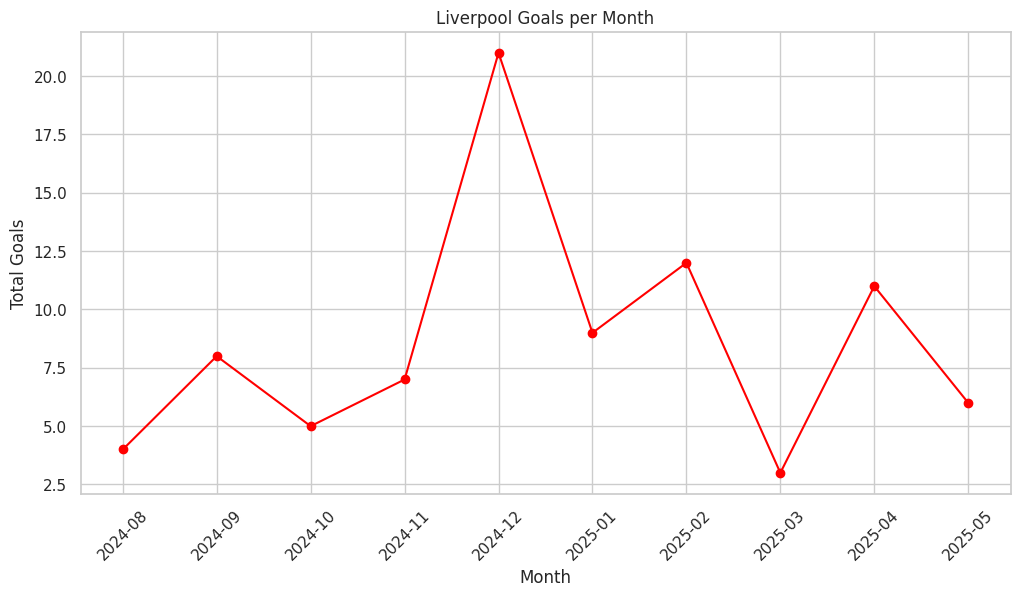

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc file
fixtures = pd.read_csv("fixtures.csv")

# Chỉ lấy các trận của Liverpool
liverpool_matches = fixtures[(fixtures["Home"] == "Liverpool") | (fixtures["Away"] == "Liverpool")].copy()

# Xác định vị trí (Home/Away)
liverpool_matches["Location"] = liverpool_matches.apply(
    lambda row: "Home" if row["Home"] == "Liverpool" else "Away", axis=1
)

# Bàn thắng Liverpool ghi được trong từng trận
liverpool_matches["LiverpoolGoals"] = liverpool_matches.apply(
    lambda row: row["HomeScore"] if row["Home"] == "Liverpool" else row["AwayScore"], axis=1
)

# Chuyển cột Date về dạng datetime
liverpool_matches["Date"] = pd.to_datetime(liverpool_matches["Date"], errors="coerce")

# Thêm cột tháng
liverpool_matches["Month"] = liverpool_matches["Date"].dt.to_period("M")

# --- 1. Xu hướng theo TRẬN (thứ tự trận) ---
plt.figure(figsize=(12,6))
plt.plot(range(1, len(liverpool_matches)+1), liverpool_matches["LiverpoolGoals"], marker="o")
plt.title("Liverpool Goals per Match")
plt.xlabel("Match Number")
plt.ylabel("Goals Scored")
plt.grid(True)
plt.show()

# --- 2. Xu hướng theo THÁNG ---
monthly_goals = liverpool_matches.groupby("Month")["LiverpoolGoals"].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(monthly_goals["Month"].astype(str), monthly_goals["LiverpoolGoals"], marker="o", color="red")
plt.title("Liverpool Goals per Month")
plt.xlabel("Month")
plt.ylabel("Total Goals")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
